In [1]:
%matplotlib inline

import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.plots as plots
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.utils as utils

In [2]:
conn = db.SimpleDatabase('pairs_survey.db')
outDir='output'

In [3]:
bundleList = []

slicer = slicers.HealpixSlicer(nside=64, latCol='zenithDistance', lonCol='az', useCache=False)
stacker = stackers.ZenithDistStacker(altCol='alt')
sql = ''
metric = metrics.CountMetric('mjd', metricName='Nvisits as function of Alt/Az')
plotFuncs = [plots.LambertSkyMap()]
bundle = metricBundles.MetricBundle(metric, slicer, sql, plotFuncs=plotFuncs, stackerList=[stacker])
bundleList.append(bundle)

slicer = slicers.HealpixSlicer(latCol='dec', lonCol='ra')
filters = ['u', 'g', 'r', 'i','z', 'y']
sqls = ['filter = "%s"' % filtername for filtername in filters]
for sql in sqls:
    metric = metrics.MedianMetric(col='fivesigmadepth')
    bundle = metricBundles.MetricBundle(metric, slicer, sql)
    bundleList.append(bundle)
    
sqls.append('')
filters.append('all')
for sql,filtername in zip(sqls,filters):
    metric = metrics.CountMetric('mjd', metricName='Count_%s' % filtername)
    bundle = metricBundles.MetricBundle(metric, slicer, sql)
    bundleList.append(bundle)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


In [4]:
slicer = slicers.OneDSlicer(sliceColName='night', binsize=1)
metric = metrics.OpenShutterFractionMetric(slewTimeCol='slewtime', expTimeCol='exptime', visitTimeCol='exptime')
sql=''
bundle = metricBundles.MetricBundle(metric, slicer, sql)
bundleList.append(bundle)


slicer=slicers.UniSlicer()
bundle = metricBundles.MetricBundle(metric, slicer, sql)
bundleList.append(bundle)

slicer=slicers.UniSlicer()
metric = metrics.MeanMetric(col='slewtime')
bundle = metricBundles.MetricBundle(metric, slicer, sql)
bundleList.append(bundle)


slicer = slicers.OneDSlicer(sliceColName='slewtime', binsize=2)
metric = metrics.CountMetric(col='slewtime', metricName='Slew Time Histogram')
bundle = metricBundles.MetricBundle(metric, slicer, sql, plotDict={'logScale':True, 'ylabel':'Count'})
bundleList.append(bundle)

In [5]:
bd = metricBundles.makeBundlesDictFromList(bundleList)
group = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir)

In [6]:
group.runAll()

Querying database with constraint filter = "i"
fivesigmadepth not in columnMap
ra not in columnMap
Querying database with no constraint.
ra not in columnMap
alt not in columnMap
az not in columnMap
Querying database with constraint filter = "r"
fivesigmadepth not in columnMap
ra not in columnMap
Querying database with constraint filter = "y"
fivesigmadepth not in columnMap
ra not in columnMap
Querying database with constraint filter = "g"
fivesigmadepth not in columnMap
ra not in columnMap
Querying database with constraint filter = "z"
fivesigmadepth not in columnMap
ra not in columnMap
Querying database with constraint filter = "u"
fivesigmadepth not in columnMap
ra not in columnMap


/Users/elahesadatnaghib/gitRepos/sims_maf/python/lsst/sims/maf/metricBundles/metricBundleGroup.py:258: UserWarning: One of the columns requested from the database was not available. Skipping constraint filter = "i"
  ' Skipping constraint %s' % constraint)
/Users/elahesadatnaghib/gitRepos/sims_maf/python/lsst/sims/maf/metricBundles/metricBundleGroup.py:258: UserWarning: One of the columns requested from the database was not available. Skipping constraint 
  ' Skipping constraint %s' % constraint)
/Users/elahesadatnaghib/gitRepos/sims_maf/python/lsst/sims/maf/metricBundles/metricBundleGroup.py:258: UserWarning: One of the columns requested from the database was not available. Skipping constraint filter = "r"
  ' Skipping constraint %s' % constraint)
/Users/elahesadatnaghib/gitRepos/sims_maf/python/lsst/sims/maf/metricBundles/metricBundleGroup.py:258: UserWarning: One of the columns requested from the database was not available. Skipping constraint filter = "y"
  ' Skipping constraint %s

Plotting figures with "filter = "i"" constraint now.


/Users/elahesadatnaghib/gitRepos/sims_maf/python/lsst/sims/maf/plots/plotHandler.py:514: UserWarning: MetricBundle (opsim_Median_fivesigmadepth_i_HEAL) has no attribute "metricValues". Either the values have not been calculated or they have been deleted.
  warnings.warn(msg)
/Users/elahesadatnaghib/gitRepos/sims_maf/python/lsst/sims/maf/plots/plotHandler.py:514: UserWarning: MetricBundle (opsim_Count_i_i_HEAL) has no attribute "metricValues". Either the values have not been calculated or they have been deleted.
  warnings.warn(msg)


Plotting complete.
Plotting figures with "" constraint now.


/Users/elahesadatnaghib/gitRepos/sims_maf/python/lsst/sims/maf/plots/plotHandler.py:514: UserWarning: MetricBundle (opsim_Nvisits_as_function_of_Alt_Az_HEAL) has no attribute "metricValues". Either the values have not been calculated or they have been deleted.
  warnings.warn(msg)
/Users/elahesadatnaghib/gitRepos/sims_maf/python/lsst/sims/maf/plots/plotHandler.py:514: UserWarning: MetricBundle (opsim_Slew_Time_Histogram_ONED) has no attribute "metricValues". Either the values have not been calculated or they have been deleted.
  warnings.warn(msg)
/Users/elahesadatnaghib/gitRepos/sims_maf/python/lsst/sims/maf/plots/plotHandler.py:514: UserWarning: MetricBundle (opsim_Count_all_HEAL) has no attribute "metricValues". Either the values have not been calculated or they have been deleted.
  warnings.warn(msg)
/Users/elahesadatnaghib/gitRepos/sims_maf/python/lsst/sims/maf/plots/plotHandler.py:514: UserWarning: MetricBundle (opsim_OpenShutterFraction_ONED) has no attribute "metricValues". Eit

Plotting complete.
Plotting figures with "filter = "r"" constraint now.


/Users/elahesadatnaghib/gitRepos/sims_maf/python/lsst/sims/maf/plots/plotHandler.py:514: UserWarning: MetricBundle (opsim_Count_r_r_HEAL) has no attribute "metricValues". Either the values have not been calculated or they have been deleted.
  warnings.warn(msg)


Plotting complete.
Plotting figures with "filter = "y"" constraint now.


/Users/elahesadatnaghib/gitRepos/sims_maf/python/lsst/sims/maf/plots/plotHandler.py:514: UserWarning: MetricBundle (opsim_Median_fivesigmadepth_y_HEAL) has no attribute "metricValues". Either the values have not been calculated or they have been deleted.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Users/elahesadatnaghib/gitRepos/sims_maf/python/lsst/sims/maf/plots/plotHandler.py:514: UserWarning: MetricBundle (opsim_Count_y_y_HEAL) has no attribute "metricValues". Either the values have not been calculated or they have been deleted.
  warnings.warn(msg)


Plotting complete.
Plotting figures with "filter = "g"" constraint now.


/Users/elahesadatnaghib/gitRepos/sims_maf/python/lsst/sims/maf/plots/plotHandler.py:514: UserWarning: MetricBundle (opsim_Count_g_g_HEAL) has no attribute "metricValues". Either the values have not been calculated or they have been deleted.
  warnings.warn(msg)
/Users/elahesadatnaghib/gitRepos/sims_maf/python/lsst/sims/maf/plots/plotHandler.py:514: UserWarning: MetricBundle (opsim_Median_fivesigmadepth_g_HEAL) has no attribute "metricValues". Either the values have not been calculated or they have been deleted.
  warnings.warn(msg)


Plotting complete.
Plotting figures with "filter = "z"" constraint now.


/Users/elahesadatnaghib/gitRepos/sims_maf/python/lsst/sims/maf/plots/plotHandler.py:514: UserWarning: MetricBundle (opsim_Median_fivesigmadepth_z_HEAL) has no attribute "metricValues". Either the values have not been calculated or they have been deleted.
  warnings.warn(msg)
/Users/elahesadatnaghib/gitRepos/sims_maf/python/lsst/sims/maf/plots/plotHandler.py:514: UserWarning: MetricBundle (opsim_Count_z_z_HEAL) has no attribute "metricValues". Either the values have not been calculated or they have been deleted.
  warnings.warn(msg)


Plotting complete.
Plotting figures with "filter = "u"" constraint now.


/Users/elahesadatnaghib/gitRepos/sims_maf/python/lsst/sims/maf/plots/plotHandler.py:514: UserWarning: MetricBundle (opsim_Count_u_u_HEAL) has no attribute "metricValues". Either the values have not been calculated or they have been deleted.
  warnings.warn(msg)
/Users/elahesadatnaghib/gitRepos/sims_maf/python/lsst/sims/maf/plots/plotHandler.py:514: UserWarning: MetricBundle (opsim_Median_fivesigmadepth_u_HEAL) has no attribute "metricValues". Either the values have not been calculated or they have been deleted.
  warnings.warn(msg)


Plotting complete.


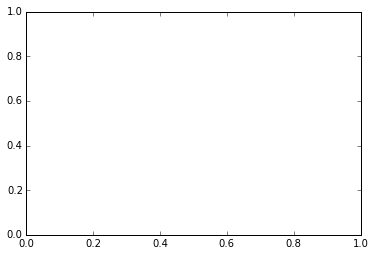

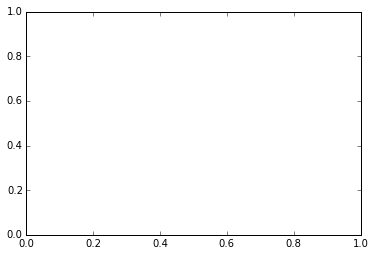

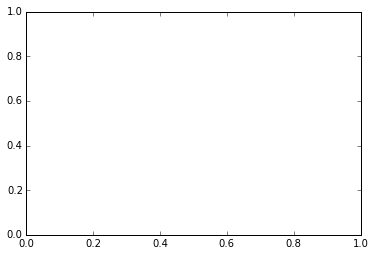

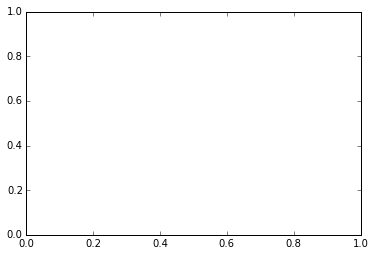

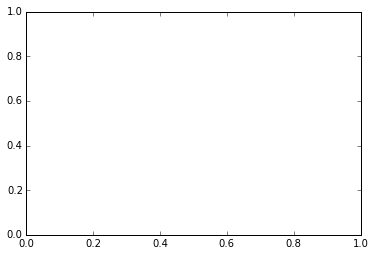

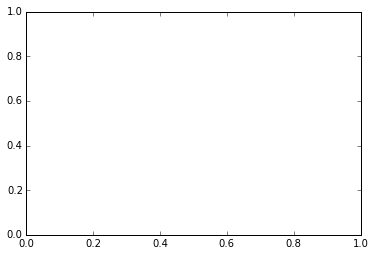

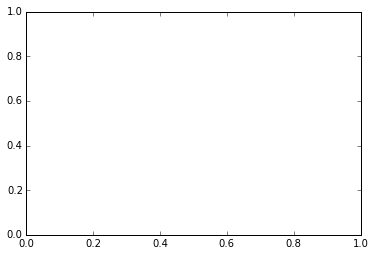

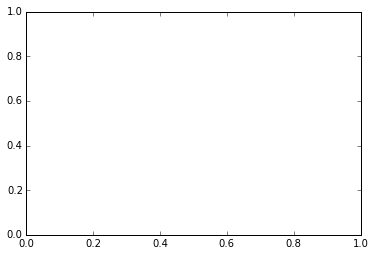

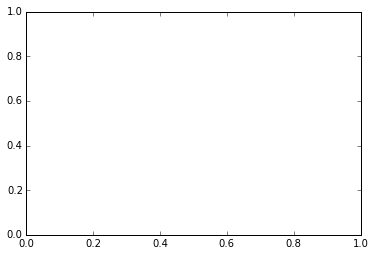

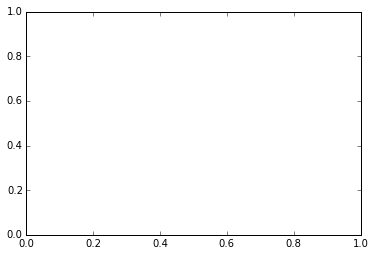

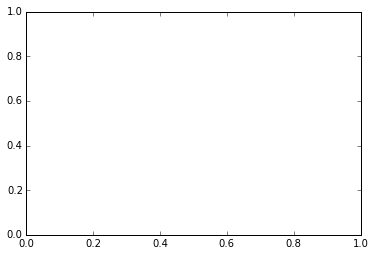

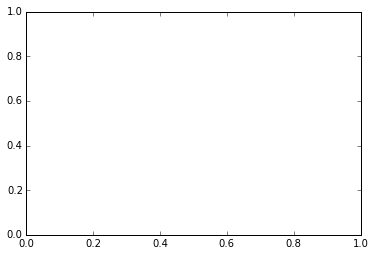

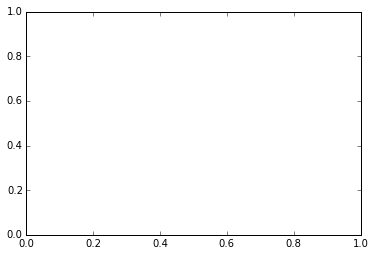

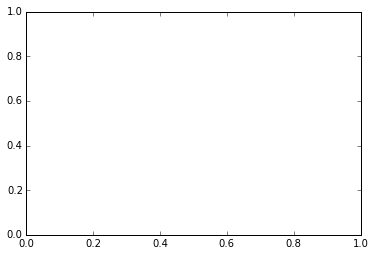

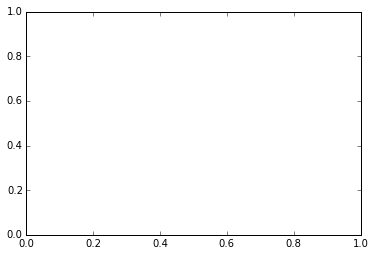

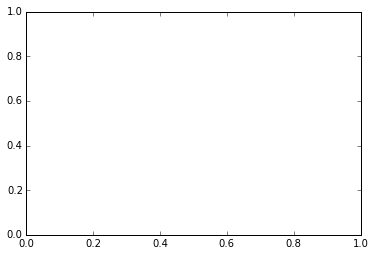

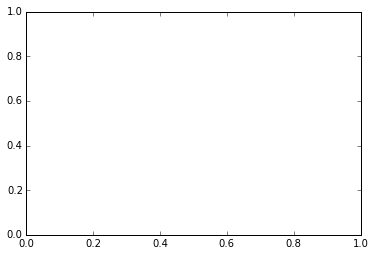

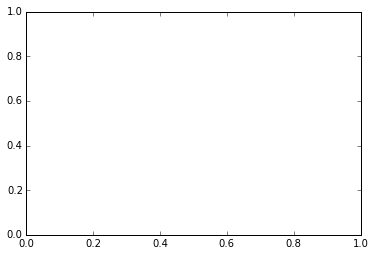

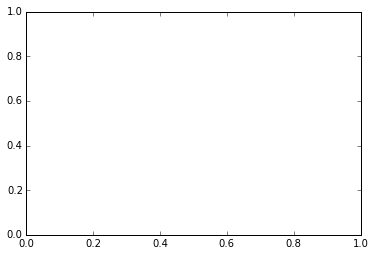

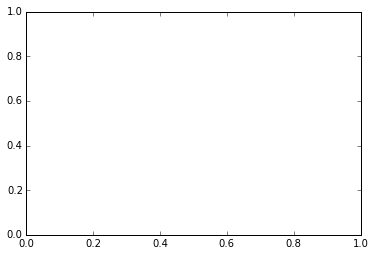

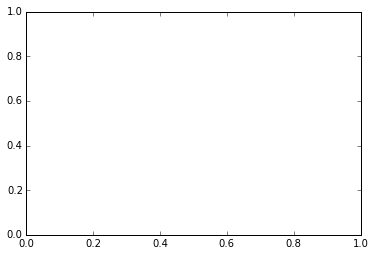

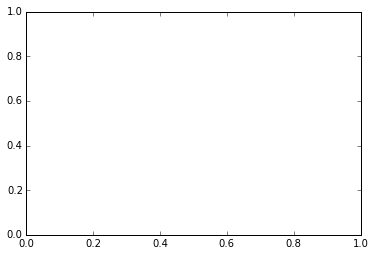

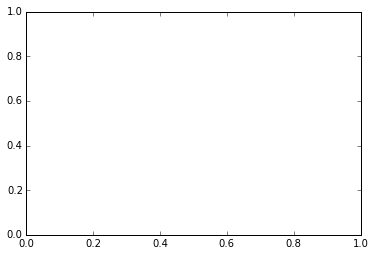

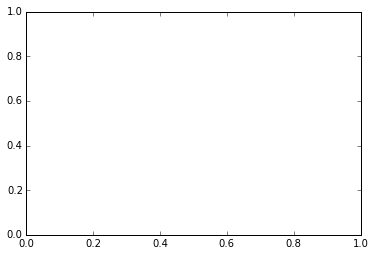

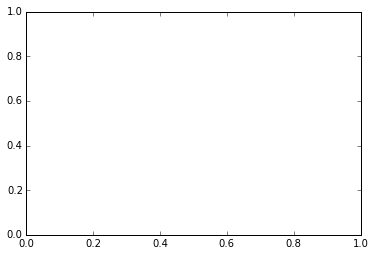

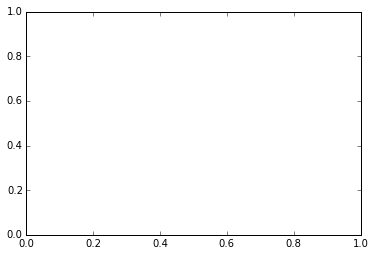

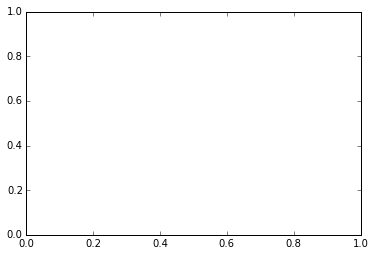

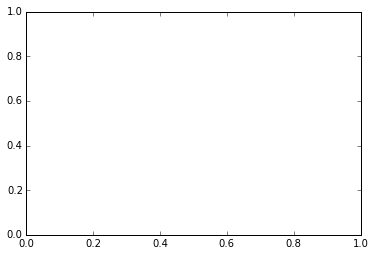

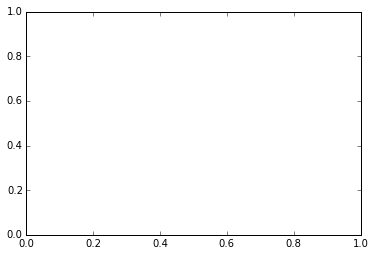

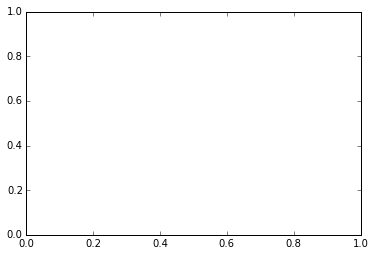

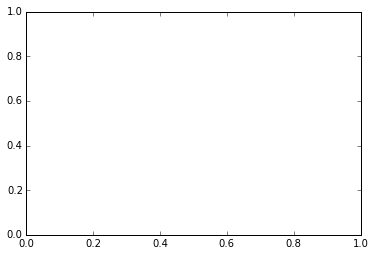

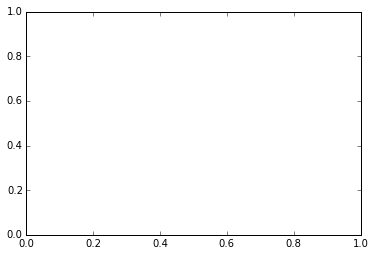

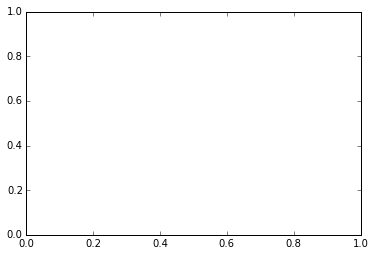

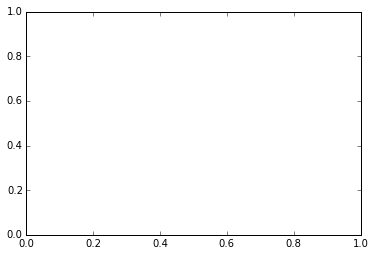

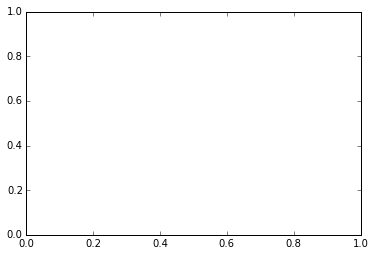

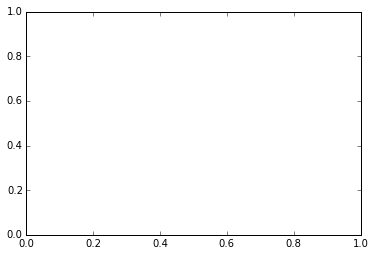

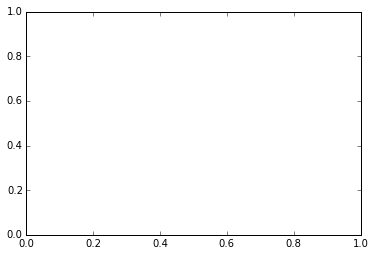

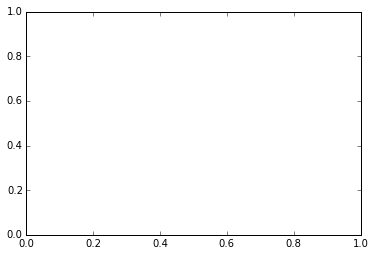

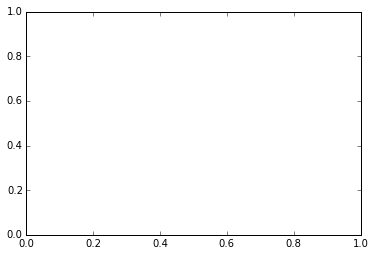

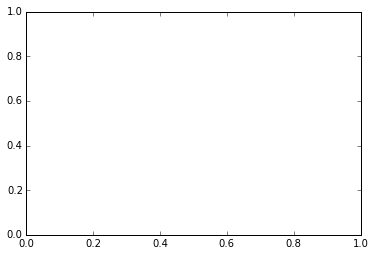

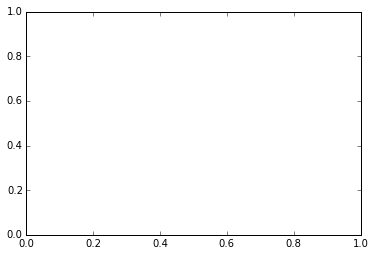

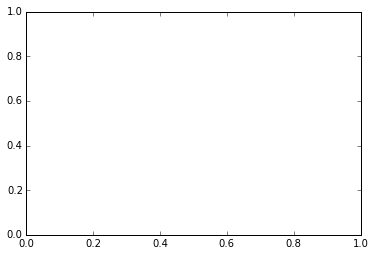

In [7]:
group.plotAll(closefigs=False)